# Carga de Documentos

## RAG Retrieval Augmented Generation

## **¿Cuál es uno de los problemas de los LLM'S?**

La falta muchas veces de una buena fuente y de actualización en muchas momentos de la información, así como las alucinaciones que puede llegar a tener.

## **¿Cómo se soluciona ese problema?** - ***Retrieval Augmented Generation***

A través de un Almacenamiento de Contenido (data store) como podría ser:

* Internet
* Documentos

El LLM **procesa la petición (query o prompt)** del usuario y con el Almacenamiento de contenido pide **Recuperar (retrieve) la información** que contenga el modelo con respecto a los documentos previamente añadidos en el Almacenamiento de Contenido (data store) .

Esto te facilita, porque no tienes que volver a entrenar el modelo si es que surge nueva infomación con respecto al tema en específico en el que  tu data store esta especializado.

Es menos probable que alucine o se filtren datos.

Esto es útil si queremos hacer preguntas sobre documentos específicos (por ejemplo, nuestros PDF, un conjunto de videos, etc.).

## ¿Qué es RAG (Retrieval Augmented Generation) ?
* ## Retrieve - Augment - Generate
* ## Recuperar - Aumentar - Generar

RAG es un AI framework para recuperar data o conocimiento externo para ayudar a los large language models (LLMs) a ser más precisos, actualizados y a brindarle a los usuarios los insight correspondientes.


### Sources

* https://research.ibm.com/blog/retrieval-augmented-generation-RAG
* https://www.youtube.com/watch?v=T-D1OfcDW1M







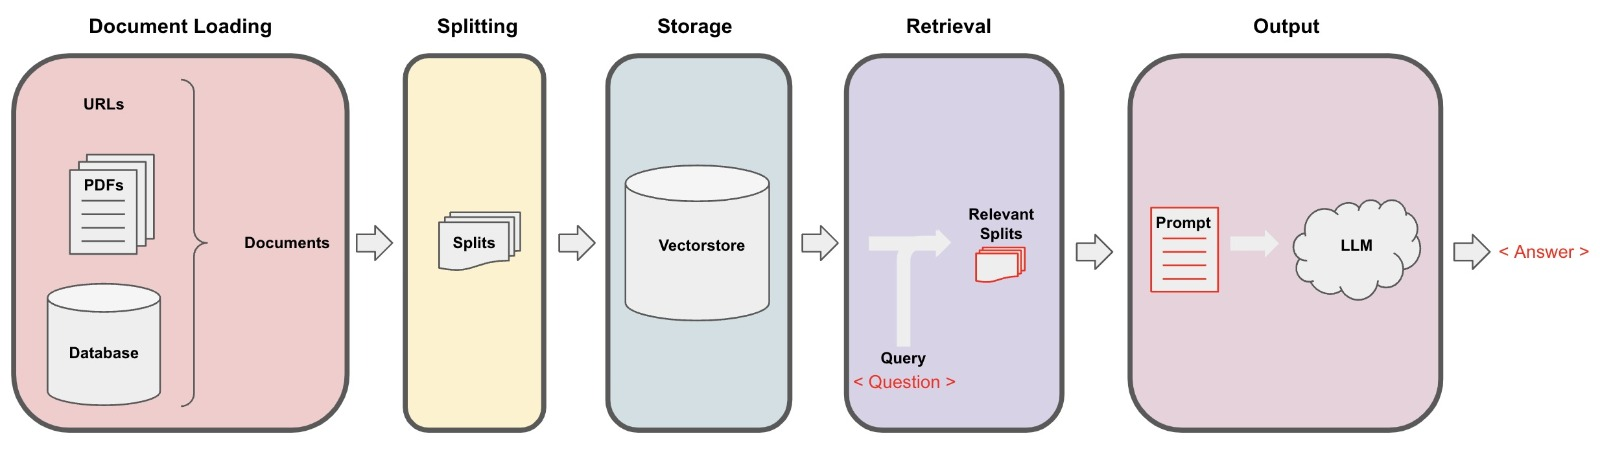

# Instalaciones

In [1]:
pip install openai

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install langchain

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pypdf

Note: you may need to restart the kernel to use updated packages.


# Imports

In [5]:
import os
import openai
import sys
sys.path.append('../..')

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.environ['OPENAI_API_KEY']

# Define tu clave de API directamente aquí
# openai.api_key = "sk-proj-4rOqX6VdFgPm31CoTmFpT3BlbkFJ6NNxQDLeFYaX6WyCDMdt"

# Ahora puedes usar la biblioteca openai normalmente




---



# Extracción de Data de un PDF

In [6]:
!mkdir pdfs

mkdir: pdfs: File exists


In [7]:
!gdown 1gpc_xdOrsBcZ7mq_Mi5Ni00tbexADgfi -O pdfs/Asistente_virtual.pdf

zsh:1: command not found: gdown


In [8]:
from langchain.document_loaders import PyPDFLoader
loader = PyPDFLoader("/Users/edu/Documents/aplicaciones_redes/pdfs/Asistente_virtual.pdf")
pages = loader.load()

In [9]:
print(pages)

[Document(page_content='INSTITUTO\nPOLITÉCNICO\nNACIONAL\nUNIDAD\nPROFESIONAL\nINTERDISCIPLINARIA\nDE\nINGENIERÍA\nCIENCIAS\nSOCIALES\nY\nADMINISTRATIVAS\nMateria:\nAplicación\nde\nRedes\nSecuencia:\n4NV81\nIntegrantes:\n●\nCastro\nHernandez\nAlan\nDaniel\n●\nDominguez\nNavarrete\nEduardo\n●\nPacheco\nGarcía\nVíctor\nAlejandro\n●\nHerrera\nCano\nEdwin\nFecha\nde\nentrega:\n20/03/2024\n', metadata={'source': '/Users/edu/Documents/aplicaciones_redes/pdfs/Asistente_virtual.pdf', 'page': 0}), Document(page_content='ASISTENTE\nDE\nDOCUMENTACIÓN.\nAlcancé\nSe\nespera\nque\neste\nproyecto\nproporcione\nuna\nsolución\ninnovadora\ny\neﬁciente \npara\nfacilitar\nel\nacceso\ny\ncomprensión\nde\ninformación\ncontenida\nen\ndocumentos \nPDF\nmediante\nel\nuso\nde\ntécnicas\navanzadas\nde\ninteligencia\nartiﬁcial\ngenerativa \n(AI\ngenerative).\nAlcance\ndel\nDesarrollo:\n●\nInvestigación\ny\nselección\nde\ntécnicas\napropiadas\nde\nIA\ngenerativa\npara\nel \ndesarrollo\ndel\nmodelo\nde\nLLM.\n●\nRe

Cada página es un "Documento".

Un "Documento" contiene texto ("page_content") y "metadatos".

Cantidad de Páginas que hay en el documento

In [10]:
len(pages)

8

In [11]:
page = pages[0]

Imprimir 500 caracteres de la página 1

In [12]:
print(page.page_content[0:500])

INSTITUTO
POLITÉCNICO
NACIONAL
UNIDAD
PROFESIONAL
INTERDISCIPLINARIA
DE
INGENIERÍA
CIENCIAS
SOCIALES
Y
ADMINISTRATIVAS
Materia:
Aplicación
de
Redes
Secuencia:
4NV81
Integrantes:
●
Castro
Hernandez
Alan
Daniel
●
Dominguez
Navarrete
Eduardo
●
Pacheco
García
Víctor
Alejandro
●
Herrera
Cano
Edwin
Fecha
de
entrega:
20/03/2024



In [13]:
page.metadata

{'source': '/Users/edu/Documents/aplicaciones_redes/pdfs/Asistente_virtual.pdf',
 'page': 0}

# URLS

In [14]:
from langchain.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://research.ibm.com/blog/retrieval-augmented-generation-RAG")

In [15]:
docs = loader.load()

In [16]:
print(docs[0].page_content[:500])

What is retrieval-augmented generation? | IBM Research BlogSkip to main contentResearchFocus areasBlogPublicationsCareersAboutBackFocus areasSemiconductorsArtificial IntelligenceQuantum ComputingHybrid CloudBackAboutOverviewLabsPeopleCollaborateBackSemiconductorsBackArtificial IntelligenceBackQuantum ComputingBackHybrid CloudBackOverviewBackLabsBackPeopleBackCollaborateResearchFocus areasSemiconductorsArtificial IntelligenceQuantum ComputingHybrid CloudBlogPublicationsCareersAboutOverviewLabsPeo


# Divisores de documentos - Splitters

In [17]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter

In [18]:
chunk_size =26
chunk_overlap = 4

In [19]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)
c_splitter = CharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)

In [20]:
text1 = 'abcdefghijklmnopqrstuvwxyz'

In [21]:
r_splitter.split_text(text1)

['abcdefghijklmnopqrstuvwxyz']

In [22]:
text2 = 'abcdefghijklmnopqrstuvwxyzabcdefg'

In [23]:
r_splitter.split_text(text2)

['abcdefghijklmnopqrstuvwxyz', 'wxyzabcdefg']

Ok, this splits the string but we have an overlap specified as 5, but it looks like 3? (try an even number)

# CHATBOT

In [24]:
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.text_splitter import CharacterTextSplitter, RecursiveCharacterTextSplitter
from langchain.vectorstores import DocArrayInMemorySearch
from langchain.document_loaders import TextLoader
from langchain.chains import RetrievalQA,  ConversationalRetrievalChain
from langchain.memory import ConversationBufferMemory
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import TextLoader
from langchain.document_loaders import PyPDFLoader

In [39]:
def load_db(file, chain_type, k):
    # load documents
    loader = PyPDFLoader(file)
    documents = loader.load()
    # split documents
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=150)
    docs = text_splitter.split_documents(documents)
    # define embedding
    embeddings = OpenAIEmbeddings()
    # create vector database from data
    db = DocArrayInMemorySearch.from_documents(docs, embeddings)
    # define retriever
    retriever = db.as_retriever(search_type="similarity", search_kwargs={"k": k})
    # create a chatbot chain. Memory is managed externally.
    qa = ConversationalRetrievalChain.from_llm(
        llm=ChatOpenAI(model_name='gpt-4-turbo'),
        chain_type=chain_type,
        retriever=retriever,
        return_source_documents=True,
        return_generated_question=True,
    )
    return qa


In [26]:
import panel as pn
import param

class cbfs(param.Parameterized):
    chat_history = param.List([])
    answer = param.String("")
    db_query  = param.String("")
    db_response = param.List([])

    def __init__(self,  **params):
        super(cbfs, self).__init__( **params)
        self.panels = []
        self.loaded_file = "/Users/edu/Documents/aplicaciones_redes/pdfs/Asistente_virtual.pdf"
        self.qa = load_db(self.loaded_file,"stuff", 4)

    def call_load_db(self, count):
        if count == 0 or file_input.value is None:  # init or no file specified :
            return pn.pane.Markdown(f"Loaded File: {self.loaded_file}")
        else:
            file_input.save("temp.pdf")  # local copy
            self.loaded_file = file_input.filename
            button_load.button_style="outline"
            self.qa = load_db("temp.pdf", "stuff", 4)
            button_load.button_style="solid"
        self.clr_history()
        return pn.pane.Markdown(f"Loaded File: {self.loaded_file}")

    def convchain(self, query):
        if not query:
            return pn.WidgetBox(pn.Row('User:', pn.pane.Markdown("", width=600)), scroll=True)
        result = self.qa({"question": query, "chat_history": self.chat_history})
        self.chat_history.extend([(query, result["answer"])])
        self.db_query = result["generated_question"]
        self.db_response = result["source_documents"]
        self.answer = result['answer']
        self.panels.extend([
            pn.Row('User:', pn.pane.Markdown(query, width=600)),
            pn.Row('ChatBot:', pn.pane.Markdown(self.answer, width=600, style={'background-color': '#F6F6F6'}))
        ])
        inp.value = ''  #clears loading indicator when cleared
        return pn.WidgetBox(*self.panels,scroll=True)

    @param.depends('db_query ', )
    def get_lquest(self):
        if not self.db_query :
            return pn.Column(
                pn.Row(pn.pane.Markdown(f"Last question to DB:", styles={'background-color': '#F6F6F6'})),
                pn.Row(pn.pane.Str("no DB accesses so far"))
            )
        return pn.Column(
            pn.Row(pn.pane.Markdown(f"DB query:", styles={'background-color': '#F6F6F6'})),
            pn.pane.Str(self.db_query )
        )

    @param.depends('db_response', )
    def get_sources(self):
        if not self.db_response:
            return
        rlist=[pn.Row(pn.pane.Markdown(f"Result of DB lookup:", styles={'background-color': '#F6F6F6'}))]
        for doc in self.db_response:
            rlist.append(pn.Row(pn.pane.Str(doc)))
        return pn.WidgetBox(*rlist, width=600, scroll=True)

    @param.depends('convchain', 'clr_history')
    def get_chats(self):
        if not self.chat_history:
            return pn.WidgetBox(pn.Row(pn.pane.Str("No History Yet")), width=600, scroll=True)
        rlist=[pn.Row(pn.pane.Markdown(f"Current Chat History variable", styles={'background-color': '#F6F6F6'}))]
        for exchange in self.chat_history:
            rlist.append(pn.Row(pn.pane.Str(exchange)))
        return pn.WidgetBox(*rlist, width=600, scroll=True)

    def clr_history(self,count=0):
        self.chat_history = []
        return


In [27]:
pip install "langchain[docarray]"

Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install jupyter_bokeh

Note: you may need to restart the kernel to use updated packages.


In [29]:
import panel as pn
pn.extension()

In [40]:
    cb = cbfs()

    file_input = pn.widgets.FileInput(accept='.pdf')
    button_load = pn.widgets.Button(name="Load DB", button_type='primary')
    button_clearhistory = pn.widgets.Button(name="Clear History", button_type='warning')
    button_clearhistory.on_click(cb.clr_history)
    inp = pn.widgets.TextInput( placeholder='Enter text here…')

    bound_button_load = pn.bind(cb.call_load_db, button_load.param.clicks)
    conversation = pn.bind(cb.convchain, inp)

    jpg_pane = pn.pane.Image( './img/convchain.jpg')

    tab1 = pn.Column(
        pn.Row(inp),
        pn.layout.Divider(),
        pn.panel(conversation,  loading_indicator=True, height=300),
        pn.layout.Divider(),
    )
    tab2= pn.Column(
        pn.panel(cb.get_lquest),
        pn.layout.Divider(),
        pn.panel(cb.get_sources ),
    )
    tab3= pn.Column(
        pn.panel(cb.get_chats),
        pn.layout.Divider(),
    )
    tab4=pn.Column(
        pn.Row( file_input, button_load, bound_button_load),
        pn.Row( button_clearhistory, pn.pane.Markdown("Clears chat history. Can use to start a new topic" )),
        pn.layout.Divider(),
        pn.Row(jpg_pane.clone(width=400))
    )
    dashboard = pn.Column(
        pn.Row(pn.pane.Markdown('# ChatWithYourData_Bot')),
        pn.Tabs(('Conversation', tab1), ('Database', tab2), ('Chat History', tab3),('Configure', tab4))
    )
    dashboard

Column
    [0] Row
        [0] Markdown(str)
    [1] Tabs
        [0] Column
            [0] Row
                [0] TextInput(placeholder='Enter text here…')
            [1] Divider()
            [2] ParamFunction(function, _pane=WidgetBox, defer_load=False, height=300, loading_indicator=True)
            [3] Divider()
        [1] Column
            [0] ParamMethod(method, _pane=Column, defer_load=False)
            [1] Divider()
            [2] ParamMethod(method, _pane=Str, defer_load=False)
        [2] Column
            [0] ParamMethod(method, _pane=WidgetBox, defer_load=False)
            [1] Divider()
        [3] Column
            [0] Row
                [0] FileInput(accept='.pdf')
                [1] Button(button_type='primary', name='Load DB')
                [2] ParamFunction(function, _pane=Markdown, defer_load=False)
            [1] Row
                [0] Button(button_type='warning', name='Clear History')
                [1] Markdown(str)
            [2] Divider()
            [3] Row
                [0] Image(str, width=400)